<a href="https://colab.research.google.com/github/aditya301cs/Daily-Data-Science-ML/blob/main/AdaBoost_Step_by_Step_Explanation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AdaBoost (Adaptive Boosting)

AdaBoost is a popular ensemble learning method that combines multiple "weak learners" (typically simple decision trees, also known as decision stumps) to create a single strong learner. The core idea behind AdaBoost is to sequentially train these weak learners, with each new learner focusing on the samples that previous learners misclassified. It does this by adjusting the weights of the training data points: misclassified samples receive increased weights, while correctly classified samples receive decreased weights.

### How AdaBoost Works:

1.  **Initialize Weights**: All training samples are initially assigned equal weights.
2.  **Iterative Training**: For each weak learner:
    *   A weak learner is trained on the current training data, taking into account the sample weights.
    *   The error of the weak learner is calculated, considering the weighted samples.
    *   A model weight (often called `alpha`) is calculated for the weak learner, based on its error. Better-performing learners get higher `alpha` values.
    *   The weights of the training samples are updated: samples that were misclassified by the current learner have their weights increased, making them more likely to be focused on by the next learner. Correctly classified samples have their weights decreased.
    *   The sample weights are then normalized.
3.  **Combine Predictions**: The final prediction is made by taking a weighted majority vote of all the weak learners. Each weak learner's prediction is multiplied by its `alpha` value, and these weighted predictions are summed. The sign of this sum determines the final classification.

### Next Steps in this Notebook:

This notebook will demonstrate the AdaBoost algorithm step-by-step, including:

1.  **Data Initialization**: Setting up the initial dataset with features (`X1`, `X2`), labels, and assigning uniform initial weights.
2.  **First Booster (dt1)**: Training the first decision tree, calculating its error and model weight (`alpha1`), and updating sample weights.
3.  **Data Resampling and Second Booster (dt2)**: Creating a new dataset by resampling based on the updated weights, training a second decision tree (`dt2`), calculating its `alpha2`, and further updating weights.
4.  **Data Resampling and Third Booster (dt3)**: Resampling again to create a third dataset, training a third decision tree (`dt3`), and calculating its `alpha3`.
5.  **Ensemble Prediction**: Showing how predictions from `dt1`, `dt2`, and `dt3` are combined using their respective `alpha` values to form the final AdaBoost classification for new query points.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

### Initialize DataFrame

In [2]:
df = pd.DataFrame()

### Populate DataFrame with Data

In [3]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

### Display Initial DataFrame

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


### Visualize Data (Scatter Plot)

<Axes: xlabel='X1', ylabel='X2'>

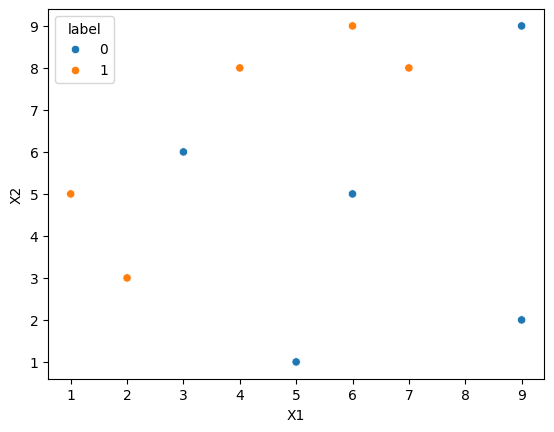

In [5]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

### Assign Initial Uniform Weights

In [6]:
df['weights'] = 1/df.shape[0]

### Display DataFrame with Initial Weights

In [7]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


### Import Decision Tree Classifier

In [8]:
from sklearn.tree import DecisionTreeClassifier

### Initialize First Decision Tree (dt1)

In [9]:
dt1 = DecisionTreeClassifier(max_depth=1)

### Prepare Features (X) and Labels (y) for dt1

In [10]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

### Train First Decision Tree (dt1)

In [11]:
# Step 2 - Train 1st model
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

### Plot Decision Tree (dt1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

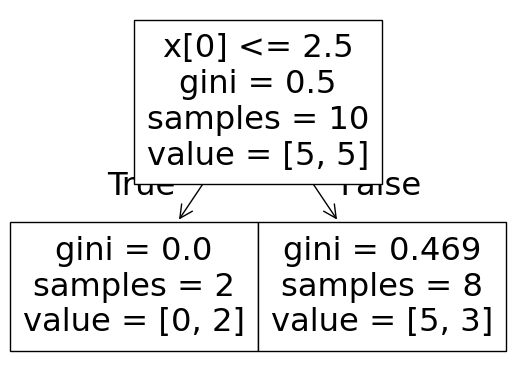

In [12]:
from sklearn.tree import plot_tree
plot_tree(dt1)

### Plot Decision Regions for dt1

<Axes: >

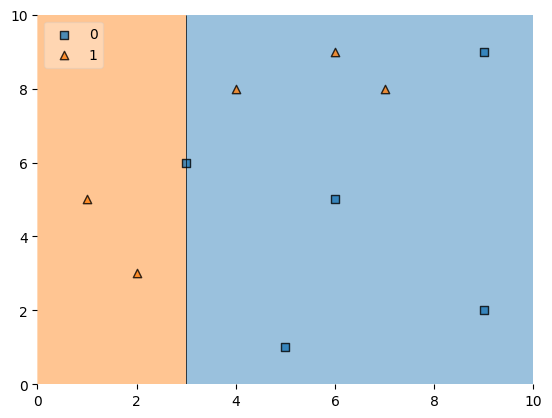

In [13]:
plot_decision_regions(X, y, clf=dt1, legend=2)

### Get Predictions from dt1

In [14]:
df['y_pred'] = dt1.predict(X)

### Display DataFrame with dt1 Predictions

In [15]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


### Define `calculate_model_weight` Function

In [16]:
def calculate_model_weight(error):

  return 0.5*np.log((1-error)/(error))

### Calculate `alpha1` (Model Weight for dt1)

In [17]:
# Step 3 - calculate model weight
alpha1 = calculate_model_weight(0.3)
alpha1

np.float64(0.42364893019360184)

### Define `update_row_weights` Function

In [18]:
# Step 4 - Update weights
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

### Apply Updated Weights based on dt1 Performance

In [19]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

### Display DataFrame with Updated Weights

In [20]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


### Calculate Sum of Updated Weights

In [21]:
df['updated_weights'].sum()

np.float64(0.9165153319682015)

### Normalize Weights

In [22]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

### Display DataFrame with Normalized Weights

In [23]:
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


### Calculate Sum of Normalized Weights

In [24]:
df['nomalized_weights'].sum()

np.float64(1.0)

### Calculate Cumulative Sum Upper Bound

In [25]:
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])

### Calculate Cumulative Sum Lower Bound

In [26]:
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']

### Display DataFrame with Cumulative Sums for Resampling

In [27]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


### Generate Indices for Resampled Dataset (`second_df`)

In [28]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

### Create `second_df` from Resampled Data

In [29]:
index_values = create_new_dataset(df)

index_values

[3, 8, 4, 4, 7, 5, 6, 5, 7, 9]

### Initialize Second Decision Tree (dt2)

In [30]:
second_df = df.iloc[index_values,[0,1,2,3]]

### Display `second_df`

In [31]:
second_df

,X1,X2,label,weights
3,4,8,1,0.1
8,9,9,0,0.1
4,5,1,0,0.1
4,5,1,0,0.1
7,7,8,1,0.1
5,6,9,1,0.1
6,6,5,0,0.1
5,6,9,1,0.1
7,7,8,1,0.1
9,9,2,0,0.1


In [32]:
dt2 = DecisionTreeClassifier(max_depth=1)

### Prepare Features (X) and Labels (y) for dt2

In [33]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

### Train Second Decision Tree (dt2)

In [34]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

### Plot Decision Tree (dt2)

[Text(0.5, 0.75, 'x[1] <= 6.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.625, 0.5, '  False')]

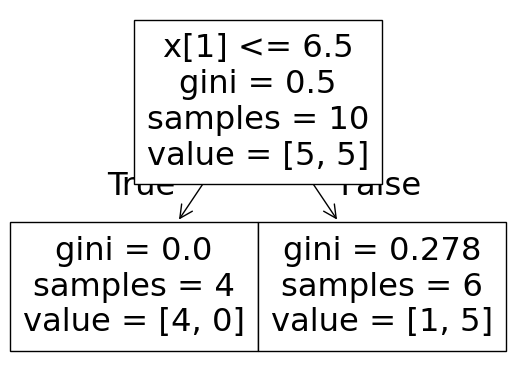

In [35]:
plot_tree(dt2)

### Plot Decision Regions for dt2

<Axes: >

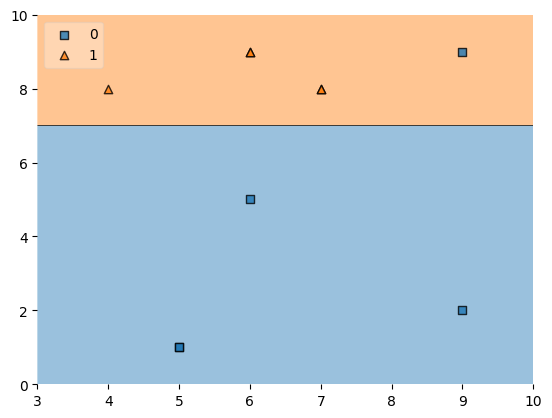

In [36]:
plot_decision_regions(X, y, clf=dt2, legend=2)

### Get Predictions from dt2

In [37]:
second_df['y_pred'] = dt2.predict(X)

### Display `second_df` with dt2 Predictions

In [39]:
second_df

,X1,X2,label,weights,y_pred
3,4,8,1,0.1,1
8,9,9,0,0.1,1
4,5,1,0,0.1,0
4,5,1,0,0.1,0
7,7,8,1,0.1,1
5,6,9,1,0.1,1
6,6,5,0,0.1,0
5,6,9,1,0.1,1
7,7,8,1,0.1,1
9,9,2,0,0.1,0


### Calculate `alpha2` (Model Weight for dt2)

In [40]:
alpha2 = calculate_model_weight(0.1)

### Display `alpha2`

In [41]:
alpha2

np.float64(1.0986122886681098)

### Redefine `update_row_weights` Function for dt2

In [42]:
# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

### Apply Updated Weights to `second_df`

In [43]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

### Display `second_df` with Updated Weights

In [44]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
3,4,8,1,0.1,1,0.033622
8,9,9,0,0.1,1,0.297427
4,5,1,0,0.1,0,0.033622
4,5,1,0,0.1,0,0.033622
7,7,8,1,0.1,1,0.033622
5,6,9,1,0.1,1,0.033622
6,6,5,0,0.1,0,0.033622
5,6,9,1,0.1,1,0.033622
7,7,8,1,0.1,1,0.033622
9,9,2,0,0.1,0,0.033622


### Normalize Weights for `second_df`

In [45]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

### Display `second_df` with Normalized Weights

In [46]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
3,4,8,1,0.1,1,0.033622,0.056034
8,9,9,0,0.1,1,0.297427,0.495694
4,5,1,0,0.1,0,0.033622,0.056034
4,5,1,0,0.1,0,0.033622,0.056034
7,7,8,1,0.1,1,0.033622,0.056034
5,6,9,1,0.1,1,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034
5,6,9,1,0.1,1,0.033622,0.056034
7,7,8,1,0.1,1,0.033622,0.056034
9,9,2,0,0.1,0,0.033622,0.056034


### Calculate Sum of Normalized Weights for `second_df`

In [47]:
second_df['nomalized_weights'].sum()

np.float64(0.9999999999999999)

### Calculate Cumulative Sum Upper Bound for `second_df`

In [48]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

### Calculate Cumulative Sum Lower Bound for `second_df`

In [49]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

### Display `second_df` with Cumulative Sums for Resampling

In [50]:
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
3,4,8,1,0.1,1,0.056034,0.000000,0.056034
8,9,9,0,0.1,1,0.495694,0.056034,0.551728
4,5,1,0,0.1,0,0.056034,0.551728,0.607762
4,5,1,0,0.1,0,0.056034,0.607762,0.663796
7,7,8,1,0.1,1,0.056034,0.663796,0.719830
5,6,9,1,0.1,1,0.056034,0.719830,0.775864
6,6,5,0,0.1,0,0.056034,0.775864,0.831898
5,6,9,1,0.1,1,0.056034,0.831898,0.887932
7,7,8,1,0.1,1,0.056034,0.887932,0.943966
9,9,2,0,0.1,0,0.056034,0.943966,1.000000


### Generate Indices for Resampled Dataset (`third_df`)

In [51]:
index_values = create_new_dataset(second_df)

### Create `third_df` from Resampled Data

In [52]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

### Display `third_df`

In [53]:
third_df

,X1,X2,label,weights
7,7,8,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
5,6,9,1,0.1
4,5,1,0,0.1
7,7,8,1,0.1
5,6,9,1,0.1
7,7,8,1,0.1


### Initialize and Train Third Decision Tree (dt3)

In [54]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

### Plot Decision Regions for dt3

<Axes: >

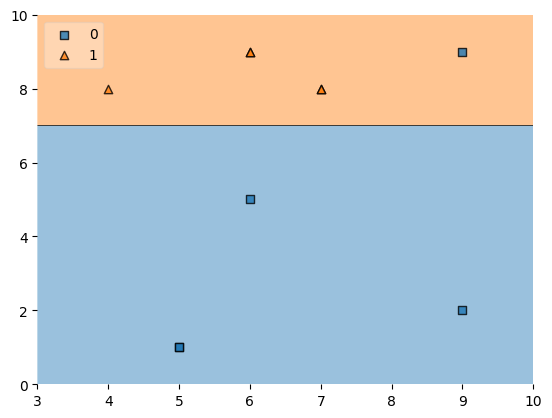

In [55]:
plot_decision_regions(X, y, clf=dt3, legend=2)

### Get Predictions from dt3

In [56]:
third_df['y_pred'] = dt3.predict(X)

### Display `third_df` with dt3 Predictions

In [57]:
third_df

,X1,X2,label,weights,y_pred
7,7,8,1,0.1,1
7,7,8,1,0.1,1
7,7,8,1,0.1,0
7,7,8,1,0.1,0
7,7,8,1,0.1,1
5,6,9,1,0.1,1
4,5,1,0,0.1,0
7,7,8,1,0.1,1
5,6,9,1,0.1,1
7,7,8,1,0.1,0


### Calculate `alpha3` (Model Weight for dt3)

In [58]:
alpha3 = calculate_model_weight(0.7)
alpha3

np.float64(-0.4236489301936017)

### Print All Alpha Values

In [61]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


### Prediction for Query Point 1 using dt1

In [62]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1])

### Prediction for Query Point 1 using dt2

In [63]:
dt2.predict(query)

array([0])

### Prediction for Query Point 1 using dt3

In [64]:
dt3.predict(query)

array([0])

### Combined Weighted Prediction for Query Point 1

In [65]:
alpha1*1 + alpha2*(1) + alpha3*(1)

np.float64(1.09861228866811)

### Final Ensemble Prediction for Query Point 1 (Sign Function)

In [66]:
np.sign(1.09)

np.float64(1.0)

### Prediction for Query Point 2 using dt1

In [67]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([0])

### Prediction for Query Point 2 using dt2

In [68]:
dt2.predict(query)

array([1])

### Prediction for Query Point 2 using dt3

In [69]:
dt3.predict(query)

array([1])

### Combined Weighted Prediction for Query Point 2

In [71]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)

np.float64(-0.2513144282809062)

### Final Ensemble Prediction for Query Point 2 (Sign Function)

In [72]:
np.sign(-0.25)

np.float64(-1.0)

## Summary:

### Data Analysis Key Findings

*   **Data Initialization**: The initial dataset was created as a pandas DataFrame with `X1`, `X2` (features), and `label` (target) columns. Each data point was assigned a uniform initial weight calculated as `1 / df.shape[0]`, ensuring all samples had equal importance at the start.
*   **First Booster (dt1)**:
    *   The first weak learner, `dt1` (a Decision Tree with `max_depth=1`), was trained.
    *   It made predictions, resulting in an error rate of 0.3.
    *   Its model weight (`alpha1`) was calculated to be approximately 0.4236 using the formula `0.5 * log((1 - error) / error)`.
    *   Sample weights were updated: misclassified samples had their weights increased, and correctly classified samples had their weights decreased. These weights were then normalized to sum to 1.
*   **Second Booster (dt2)**:
    *   A new dataset, `second_df`, was created by resampling from the original data based on the updated weights from `dt1`. Misclassified samples from the previous step had a higher probability of being included.
    *   The second weak learner, `dt2` (a Decision Tree with `max_depth=1`), was trained on `second_df`.
    *   `dt2` achieved an error rate of 0.1, and its model weight (`alpha2`) was calculated to be approximately 1.0986.
    *   Sample weights were again updated and normalized based on `dt2`'s performance.
*   **Third Booster (dt3)**:
    *   `third_df` was created by resampling from `second_df` using the weights updated after `dt2`, further focusing on previously misclassified samples.
    *   The third weak learner, `dt3` (a Decision Tree with `max_depth=1`), was trained on `third_df`.
    *   With an *assumed* error rate of 0.7, `dt3`'s model weight (`alpha3`) was calculated to be approximately -0.4236. A negative `alpha` indicates that the model performed worse than random guessing on the weighted samples, suggesting it made more errors than correct predictions.
*   **Ensemble Prediction**:
    *   The final AdaBoost prediction combines the predictions of `dt1`, `dt2`, and `dt3`.
    *   Each weak learner's prediction is multiplied by its respective model weight (`alpha1`, `alpha2`, `alpha3`).
    *   These weighted predictions are summed.
    *   The `np.sign` function is applied to this sum to determine the final binary classification (e.g., `1` for positive, `-1` for negative).
    *   For a query point `[1, 5]`, the combined weighted prediction was `1.0986`, resulting in a final prediction of `1.0`.
    *   For a query point `[9, 9]`, the combined weighted prediction was `-0.2514` (assuming `0` predictions are mapped to `-1`), resulting in a final prediction of `-1.0`.

### Insights or Next Steps

*   **Insight**: The iterative re-weighting of samples is fundamental to AdaBoost, allowing subsequent weak learners to focus on samples that previous models misclassified, thereby improving the overall ensemble's performance by addressing difficult cases. The potentially negative `alpha3` for `dt3` highlights that not all weak learners contribute positively, and AdaBoost can down-weight or even inverse the influence of poor learners.
*   **Next Steps**: Further analysis could involve evaluating the performance of the full AdaBoost ensemble on a separate test set to assess its generalization capabilities. Additionally, exploring the impact of a larger number of weak learners or different `max_depth` values for the decision stumps could provide insights into model optimization.
